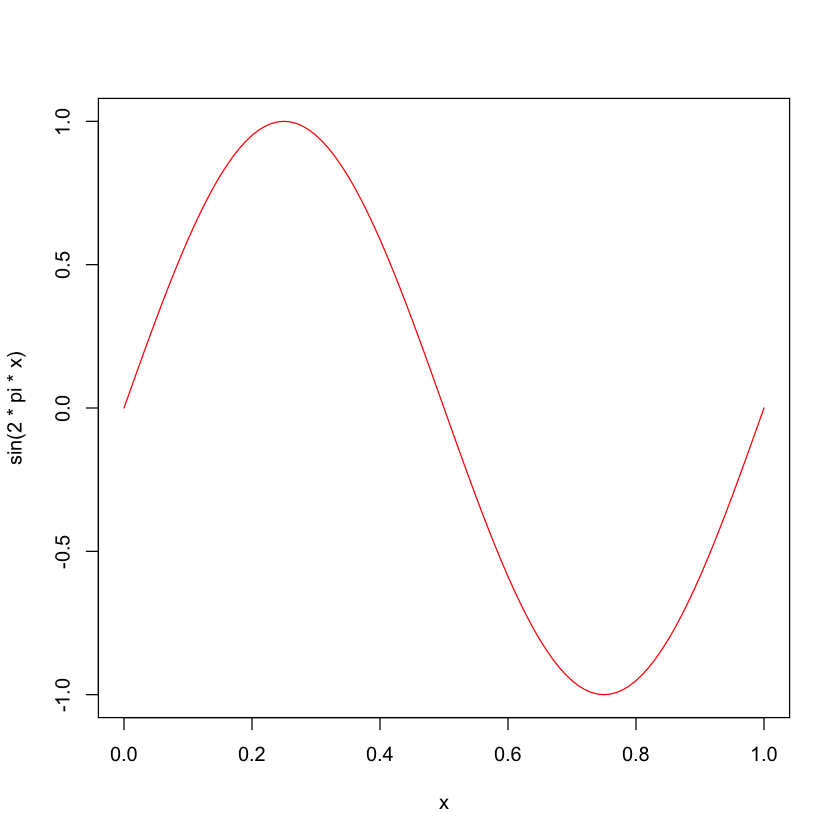

In [1]:
set.seed(100)
x <- seq(0,1,0.01)
plot(x,sin(2*pi*x),col="red",type="l")

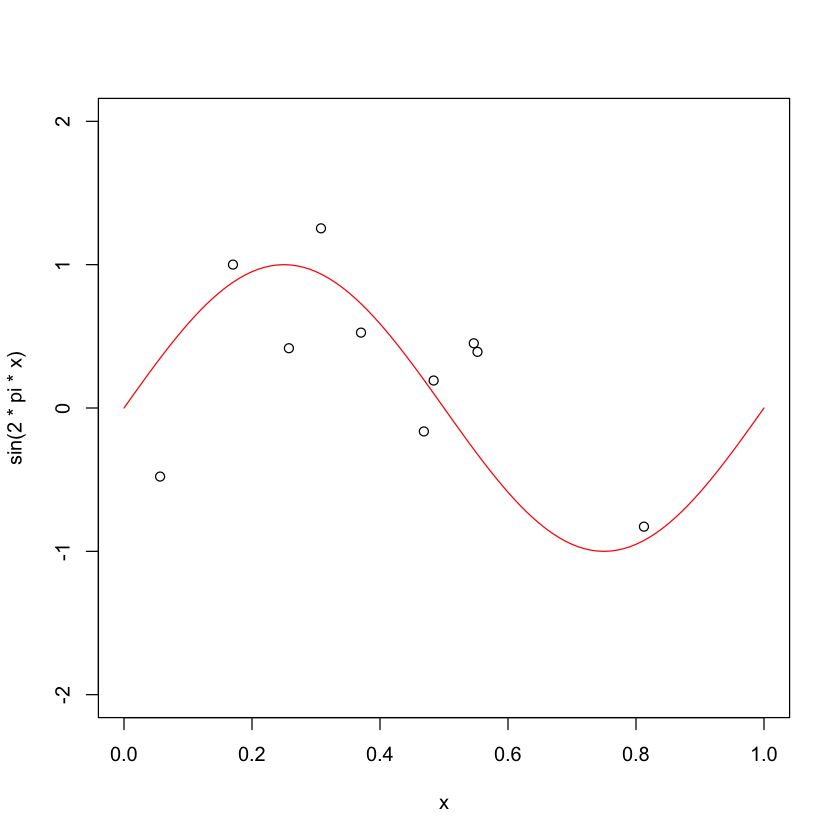

In [2]:
n <- 10
X <- runif(n,0,1)
y0 <- sin(2*pi*X)
y <- y0 + rnorm(n,0,1)
plot(x,sin(2*pi*x),col="red",type="l",ylim=c(-2,2))
points(X,y)

In [3]:
source("linReg.R")
linReg

function (X, y) 
{
    n <- nrow(X)
    p <- ncol(X)
    X <- cbind(1, X)
    invK <- solve(t(X) %*% X)
    beta <- invK %*% (t(X) %*% y)
    residual <- y - X %*% beta
    Rsq <- 1 - sum(residual^2)/sum((y - mean(y))^2)
    sig2 <- sum(residual^2)/(n - p - 1)
    Sig_beta <- sig2 * invK
    se <- sqrt(diag(Sig_beta))
    t <- beta/se
    pval <- pt(abs(t), n - p - 1, lower.tail = F) * 2
    return(list(beta = beta, sig2 = sig2, se = se, t = t, pval = pval, 
        Rsq = Rsq))
}

## Estimating the variance of parameters
Recall the Least Squares problem for multiple linear regression
$$\hat{\beta}=\min_{\tilde{\beta}}||\mathbf{y}-\mathbf{X}\tilde{\beta}||_2^2$$
The least squares estimate of $\tilde{\beta}$ is equivalent to the one obtained by maximizing the log-likelihood of data
$$\hat{\beta}=\max_{\tilde{\beta}}\ \log(p(\mathbf{y}|\mathbf{X})),\ \text{where}\ \mathbf{y}|\mathbf{X}\sim\mathcal{N}(\mathbf{X}\tilde{\beta},\sigma_e^2\mathbf{I})$$
$$\iff\hat{\beta}=\max_{\tilde{\beta}}\ -\frac{1}{2}\log \sigma_e^2-\frac{1}{2\sigma_e^2}(\mathbf{y}-\mathbf{X}\tilde{\beta})^T(\mathbf{y}-\mathbf{X}\tilde{\beta})$$
The second approach is called the . As demonstrated in the class, we can obtain the estimate of $\tilde{\beta}$ through either of the above objective funcions: $$\hat{\beta}=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$
The  additionally provides the standard error estimates of $\hat{\beta}$ using the inverse of Fisher information:
$$var(\hat{\beta})=\mathcal{I}^{-1}=\left(\frac{\partial^2 \mathcal{L}(\tilde{\beta})}{\partial \tilde{\beta}^2}\right)^{-1}=\sigma_e^2(\mathbf{X}^T\mathbf{X})^{-1}$$

0.7231929
-1.1102532
1.686017
-1.171308
0.1302789
0.2751772


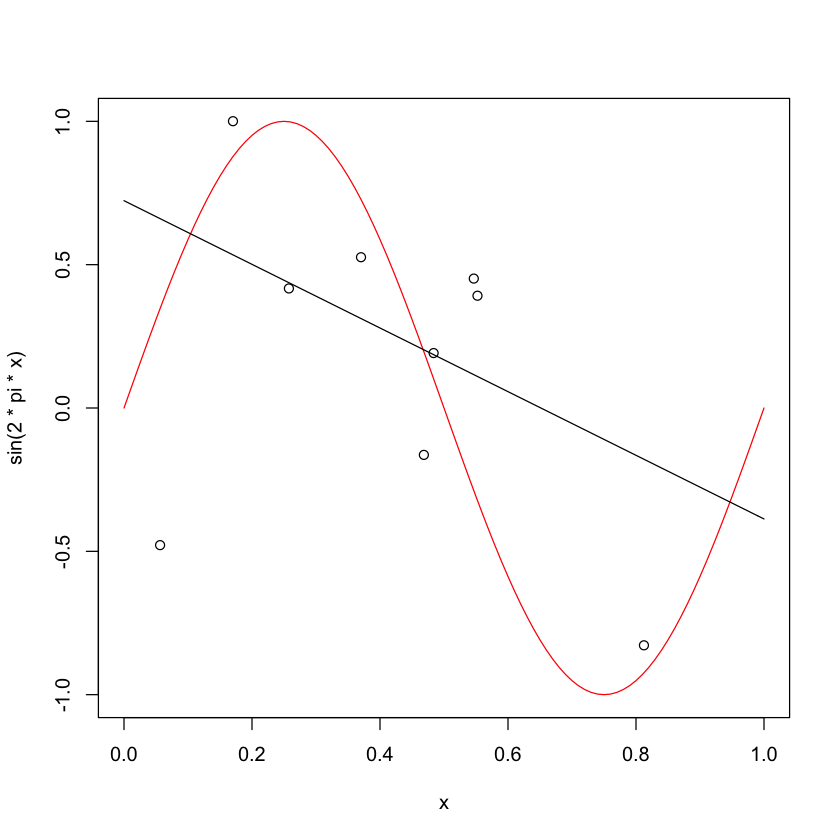

In [4]:
# fit linear regression with two parameters (intercept and first order term)
fit1 <- linReg(data.matrix(X),data.matrix(y))
fit1
yhat1 <- fit1$beta[1]+fit1$beta[2]*x
plot(x,sin(2*pi*x),col="red",type="l")
lines(x,yhat1)
points(X,y)

,-1.012214
X,14.300349
,-33.234188
,19.699277
,-1.416918
X,2.062012
,-1.806992
,1.432269
,0.20627610
X,0.08481994
,0.12077715


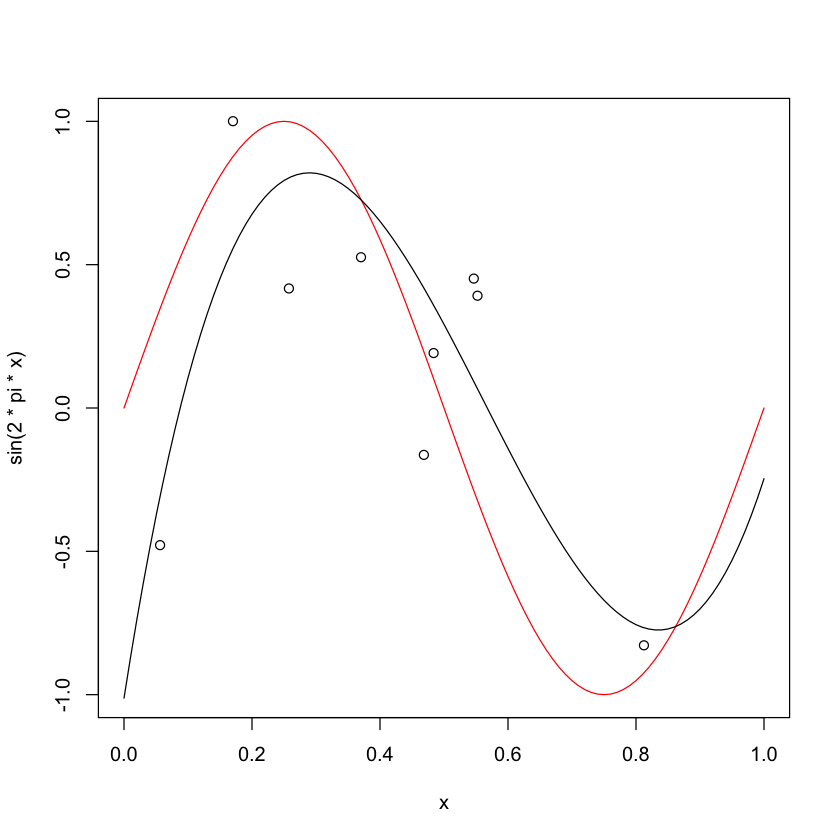

In [5]:
# fit linear regression with two parameters (intercept and first order term)
X3 <- cbind(X,X^2,X^3)
fit3 <- linReg(X3,data.matrix(y))
fit3
yhat3 <- cbind(1,x,x^2,x^3)%*%fit3$beta
plot(x,sin(2*pi*x),col="red",type="l")
lines(x,yhat3)
points(X,y)

-1.163803
9.714370
77.405178
-544.649087
1022.425637
-599.003131
-0.5676180
0.1890536
0.2009819
-0.4487213
0.6064112


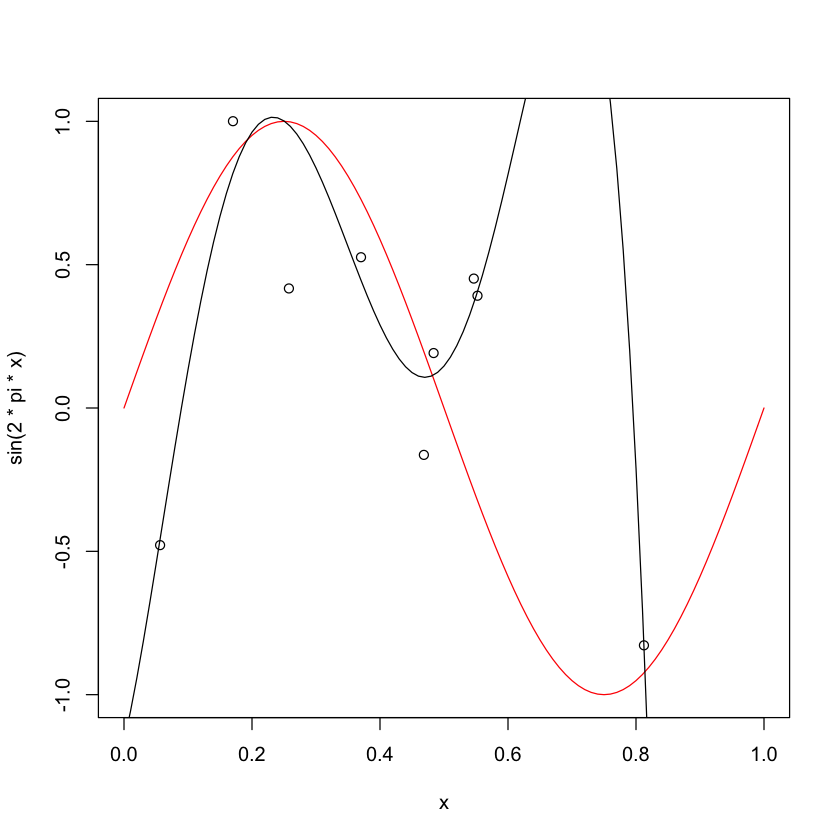

In [6]:
# fit linear regression with two parameters (intercept and first to fifth order term)
norder <- 5
orders <- 1:norder
X5 <- t(t(replicate(norder,X))^orders)
fit5 <- linReg(X5,data.matrix(y))
fit5
yhat5 <- cbind(1,(t(t(replicate(norder,x))^orders)))%*%fit5$beta
plot(x,sin(2*pi*x),col="red",type="l")
lines(x,yhat5)
points(X,y)


## Bias-variance trade-off

Recall that 

$$\mathbb{E}_{\mathcal{D}}[f(X) -\hat{f}(X; \mathcal{D})]^2 = \underbrace{\left[f(X) - \mathbb{E}_{\mathcal{D}}(\hat{f}(X;\mathcal{D}))\right]^2}_{Bias^2} + \underbrace{\mathbb{E}_{\mathcal{D}}\left[\left[\mathbb{E}_{\mathcal{D}}(\hat{f}(X;\mathcal{D})) - \hat{f}(X;\mathcal{D})\right]^2\right]}_{Variance}$$


# The bivas-variance trade-off in this example


In [7]:
trial <- 500             # number of experient trials
n <- 20                  # number of samples for each trial 
norders <- 6           # the highest order to include
orders <- 1:norders 
biasSQ <- variance <- c(0,length(orders))
betas <- vector(mode = "list",length = length(orders))

X <- runif(n,0,1)    # first order
Xall <- t(t(replicate(norders,X))^(1:norders))    # generate heigher orders
y0 <- sin(2*pi*X)    # true values of y
for(i in 1:length(orders)){
    betas_tmp <- matrix(0,trial,1+orders[i])
    Xtmp <- Xall[,1:orders[i]]    # generate design matrix from the first order to the target order
    yhat <- matrix(0,n,trial)
    for(j in 1:trial){
        y <- y0 + rnorm(n,0,1)                                # add some noise
        fit_lm <- linReg(data.matrix(Xtmp),y)           # fit linear regression
        betas_tmp[j,] <- fit_lm$beta
        yhat[,j] <- cbind(1,Xtmp)%*%fit_lm$beta     # compute predicted y values
    }
    betas[[i]] <- betas_tmp
    # compute mean of predicted values
    y_bar <- rowMeans(yhat)                 # E(f^hat)
    # compute bias^2
    biasSQ[i] <- mean((y0-y_bar)^2)       # E[ (f - E(f^hat))^2 ]
    # compute variance
    variance[i] <- mean((yhat-y_bar)^2)   # E[ (E(f^hat) - f^hat)^2 ]
}

# Visualize bias-variance trade-off

## using R base graphics

[1] 0.1683065683 0.1074243022 0.0047574394 0.0015795722 0.0006166306
[6] 0.0006504884

[1] 0.09604289 0.15076080 0.21137891 0.25124997 0.30992987 0.33871400

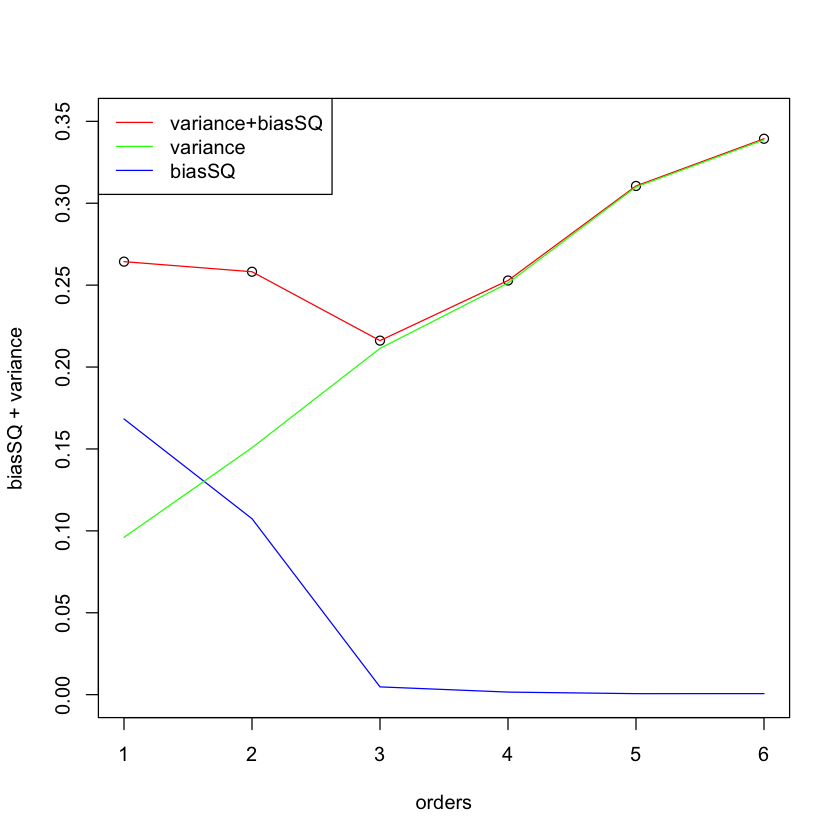

In [8]:
biasSQ 
variance

plot(orders, biasSQ + variance,ylim=c(0,0.35))
lines(orders, biasSQ + variance, col="red")
lines(orders, biasSQ, col="blue")
lines(orders, variance, col="green")
legend("topleft",legend=c("variance+biasSQ","variance","biasSQ"),col=c("red","green","blue"),lty=1)

## using ggplot2
ggplo2 is a flexible graphical package with powerful functions. You are strongly recommended to use it for generating figures!
ggplot2 tutorial: http://r-statistics.co/Complete-Ggplot2-Tutorial-Part1-With-R-Code.html

Warning message:
“package ‘ggplot2’ was built under R version 3.5.2”

biasSQ+variance,variance,biasSQ,orders
0.2643495,0.09604289,0.1683065683,1
0.2581851,0.15076080,0.1074243022,2
0.2161364,0.21137891,0.0047574394,3
0.2528295,0.25124997,0.0015795722,4
0.3105465,0.30992987,0.0006166306,5
0.3393645,0.33871400,0.0006504884,6


orders,variable,value
1,biasSQ+variance,0.2643495
2,biasSQ+variance,0.2581851
3,biasSQ+variance,0.2161364
4,biasSQ+variance,0.2528295
5,biasSQ+variance,0.3105465
6,biasSQ+variance,0.3393645


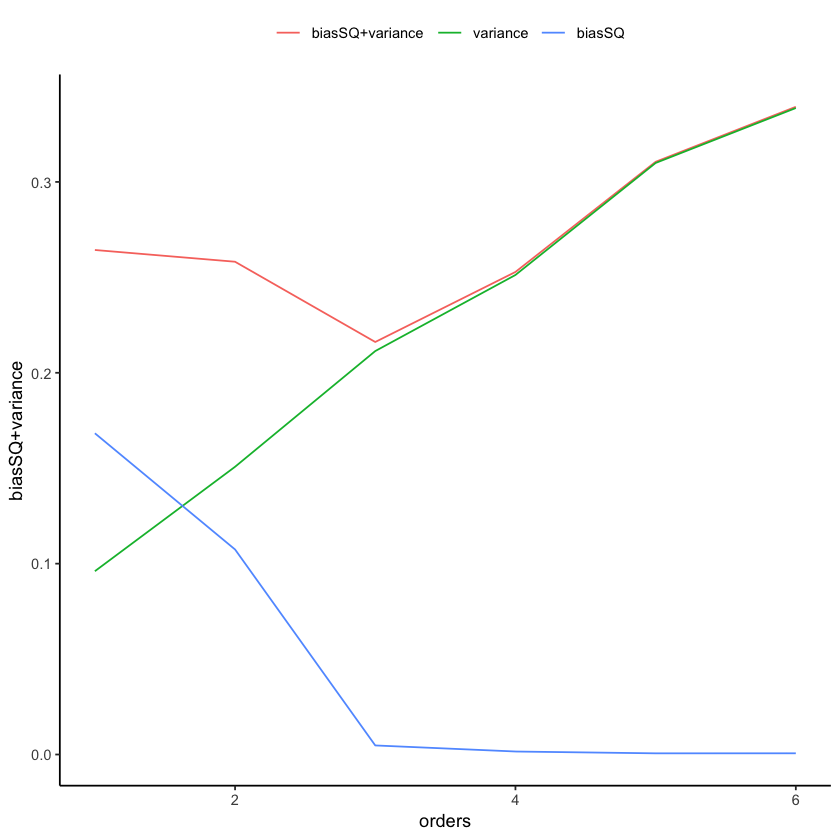

In [9]:
library(ggplot2)
library(reshape2)     # use reshape2 to conviently transform the data format
dat <- data.frame("biasSQ+variance"=variance+biasSQ,variance=variance,biasSQ=biasSQ,orders=orders,check.names = F)
head(dat)
dat <- melt(dat,id.vars = "orders")    # tranform the data format
head(dat)
ggplot(dat,aes(y=value,x=orders,col=variable)) + geom_line() + labs(y="biasSQ+variance",col="") + theme_classic() + theme(legend.position="top")

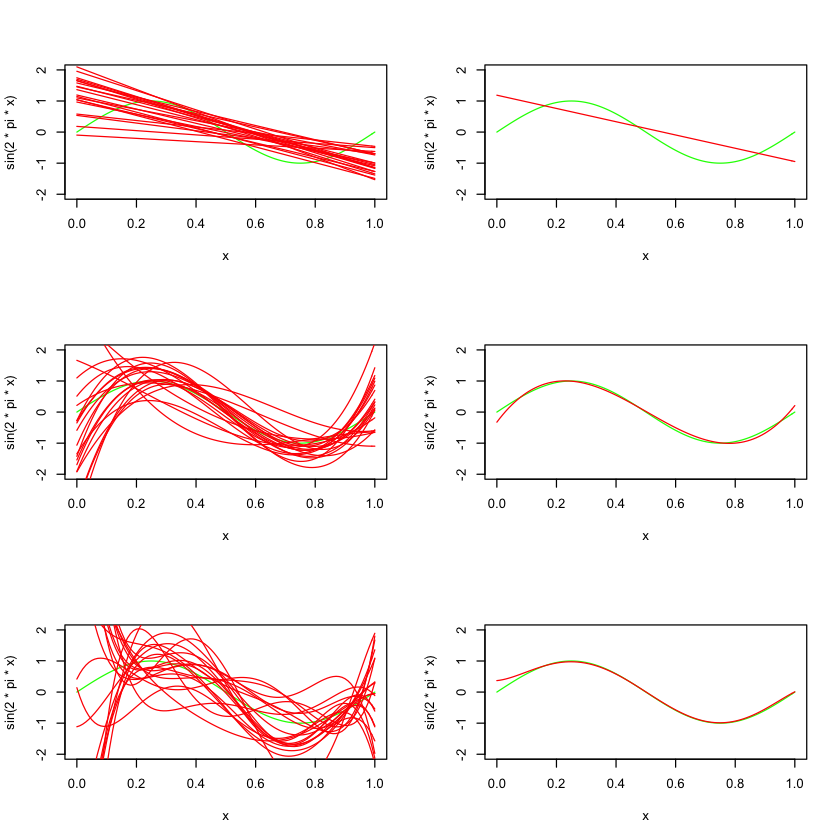

In [10]:
par(mfrow=c(3,2))
x <- seq(0,1,0.01)
for(i in c(1,3,5)){
    plot(x,sin(2*pi*x),col="green",type="l",ylim=c(-2,2))
    xtmp <- t(t(replicate(orders[i],x))^(1:orders[i]))
    yhat <- cbind(1,xtmp) %*%t(betas[[i]])
    for(j in 1:n){
        lines(x,yhat[,j],col="red")
    }
    plot(x,sin(2*pi*x),col="green",type="l",ylim=c(-2,2))
    lines(x,rowMeans(yhat),col="red",ylim=c(-2,2))
}